In [8]:
weather = ['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']
temp = ['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
play = ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [9]:
# import
from sklearn.preprocessing import LabelEncoder

# konstruksi
le = LabelEncoder()

# trainning
le.fit(weather)
weather_encoded = le.transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [10]:
temp_encoded = le.fit_transform(temp)

In [11]:
play_encoded = le.fit_transform(play)

In [12]:

print('Weather: ',weather_encoded)
print('temp: ',temp_encoded)
print('play: ',play_encoded)

Weather:  [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
temp:  [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
play:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [13]:
import pandas as pd

df = pd.DataFrame({'Weather':weather_encoded,'temp':temp_encoded,'play':play_encoded})

In [15]:
X = df[['Weather','temp']]
y = df['play']

In [16]:
#import
from sklearn.naive_bayes import GaussianNB

# konstruksi
nb = GaussianNB()

# training
nb.fit(X,y)

#prediksi
predicted = nb.predict([[0,0]])
print(predicted)

[1]


#### Multiple Label

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data, digits.target

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.88      0.72      0.79        61
           2       0.78      0.95      0.85        37
           3       0.84      0.83      0.83        52
           4       0.87      0.94      0.91        36
           5       0.89      0.86      0.88        49
           6       0.95      0.98      0.97        43
           7       0.95      0.71      0.81        52
           8       0.63      0.49      0.55        49
           9       0.49      1.00      0.66        25

    accuracy                           0.82       450
   macro avg       0.82      0.84      0.82       450
weighted avg       0.84      0.82      0.82       450



### Decision Tree

In [40]:
import pandas as pd

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigres','age','label']
df = pd.read_csv('pima_indians_diabetes.csv',header=None,names=col_names)

In [41]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigres,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigres  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigres']
X = df[feature_cols]
y = df.label

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [45]:
X_train

,pregnant,insulin,bmi,age,glucose,bp,pedigres
88,15,110,37.1,43,136,70,0.153
467,0,100,36.8,25,97,64,0.600
550,1,0,27.4,21,116,70,0.204
147,2,119,30.5,34,106,64,1.400
481,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
645,2,440,39.4,30,157,74,0.134
715,7,392,33.9,34,187,50,0.826
72,13,0,43.4,42,126,90,0.583
235,4,0,43.6,26,171,72,0.479


In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
print("Akurasi: ",accuracy_score(y_pred,y_test))

Akurasi:  0.6666666666666666


In [67]:
!pip install graphviz

You should consider upgrading via the '/Users/pusdatin/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [66]:
! pip install pydotplus

     |████████████████████████████████| 278 kB 356 kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=c9256a512297377664ea739f7bcfdd624353ede93bbaf9bdb7071be9d2c17ea7
  Stored in directory: /Users/pusdatin/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
You should consider upgrading via the '/Users/pusdatin/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [78]:
! pip install six

You should consider upgrading via the '/Users/pusdatin/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [80]:
import sklearn.tree as tree 
import pydotplus
from six import StringIO
from IPython.display import Image

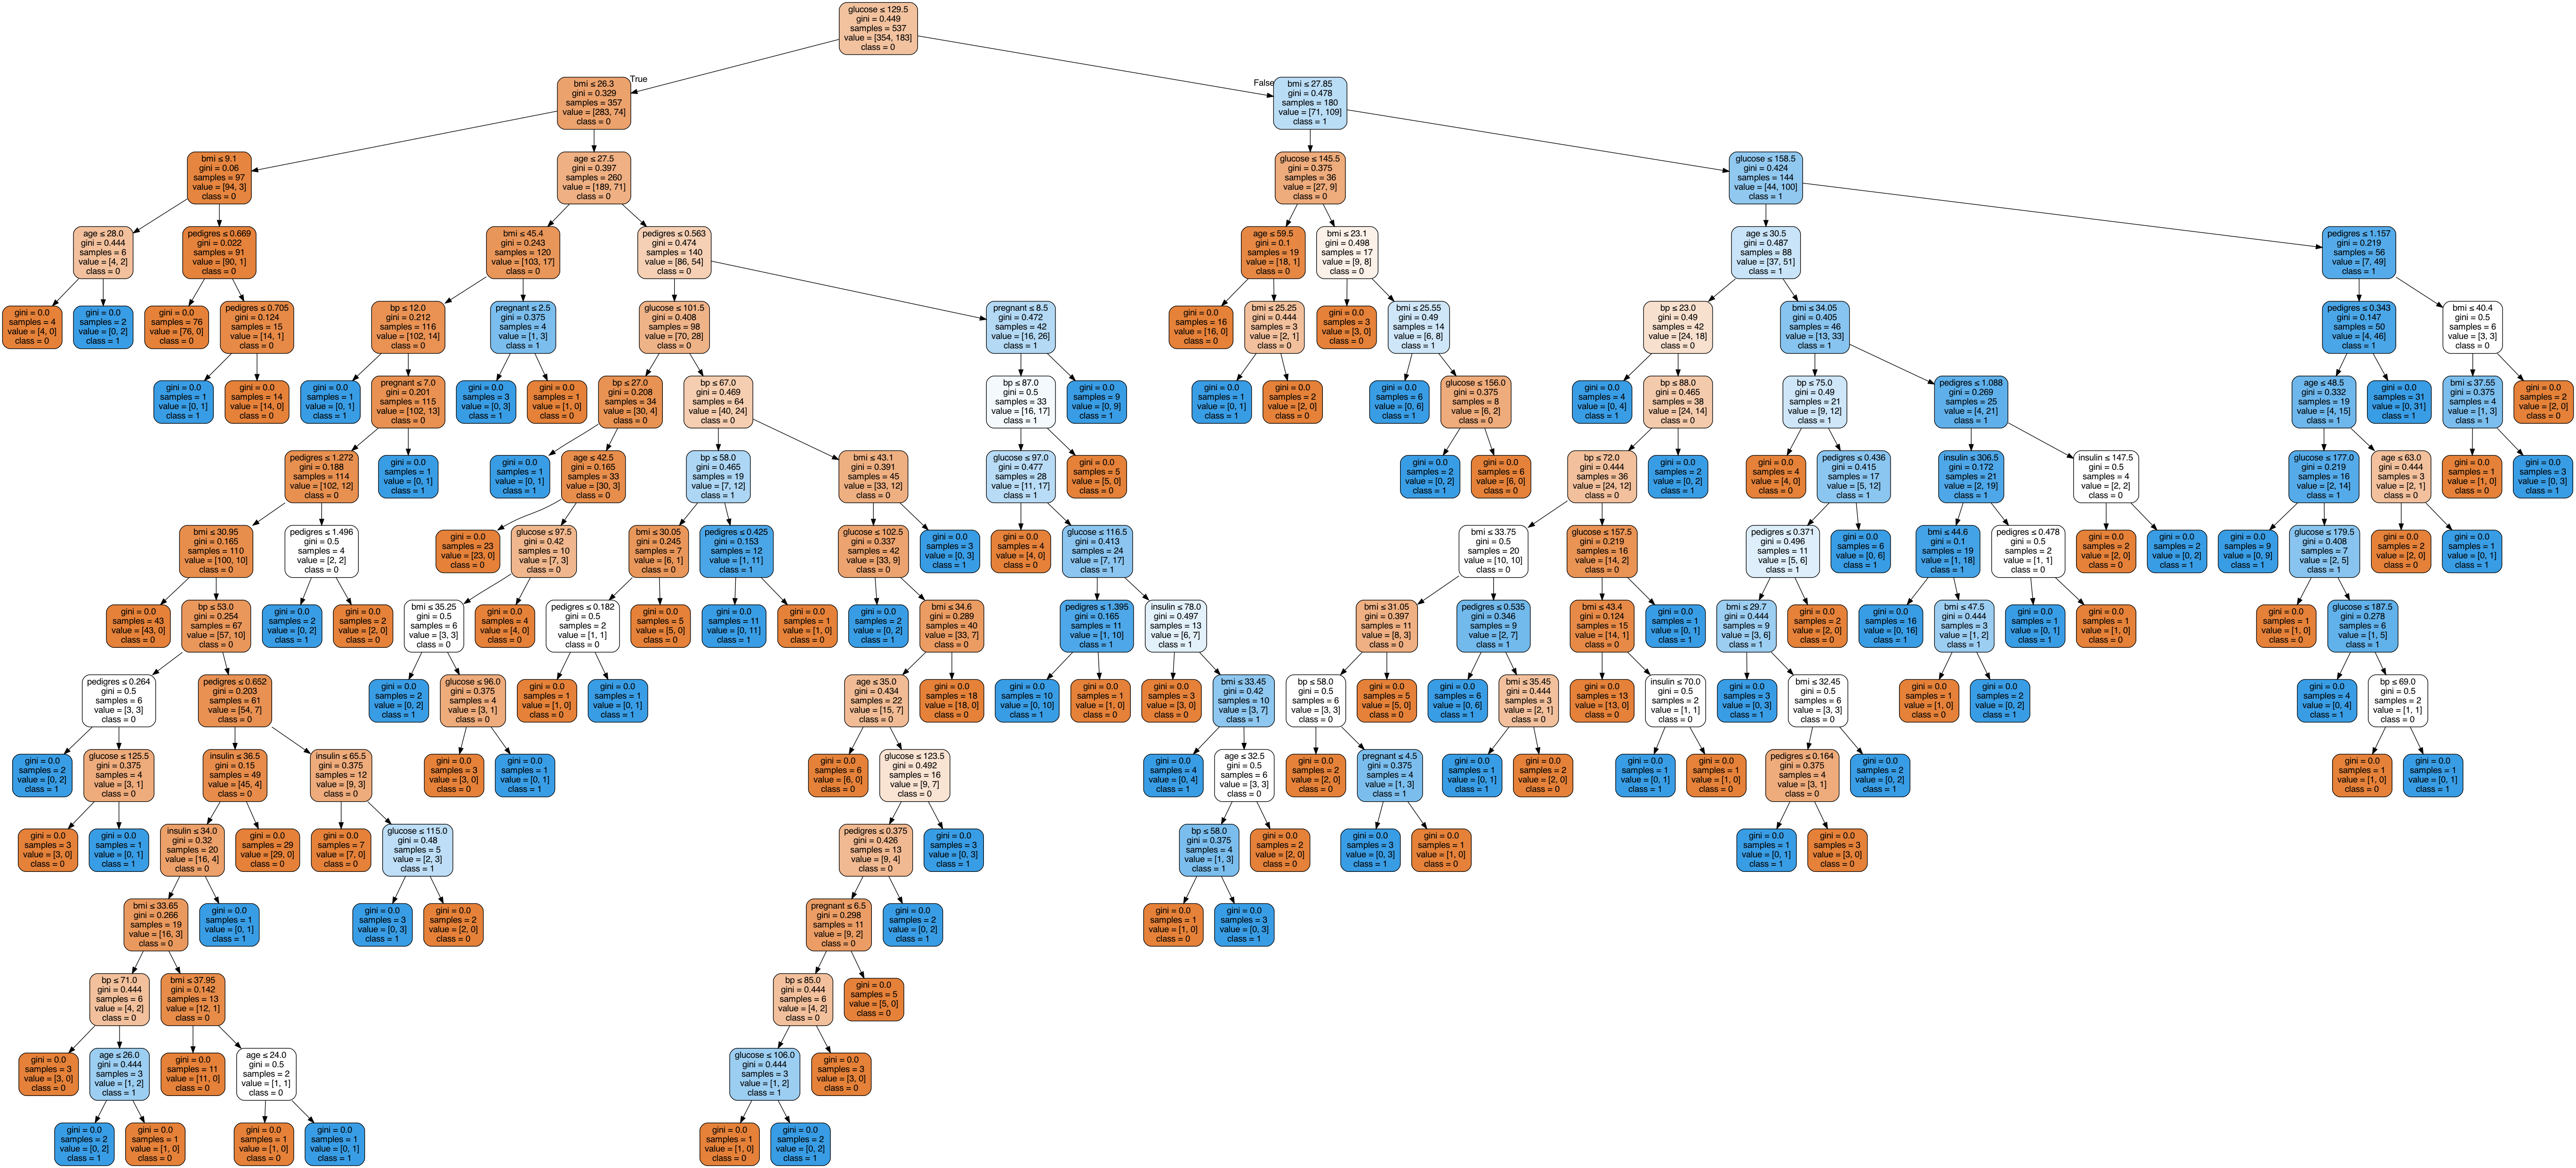

In [87]:
dot_data = StringIO()
tree.export_graphviz(dt,out_file=dot_data, class_names=['0','1'], feature_names=feature_cols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [91]:
from sklearn import metrics
dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7705627705627706


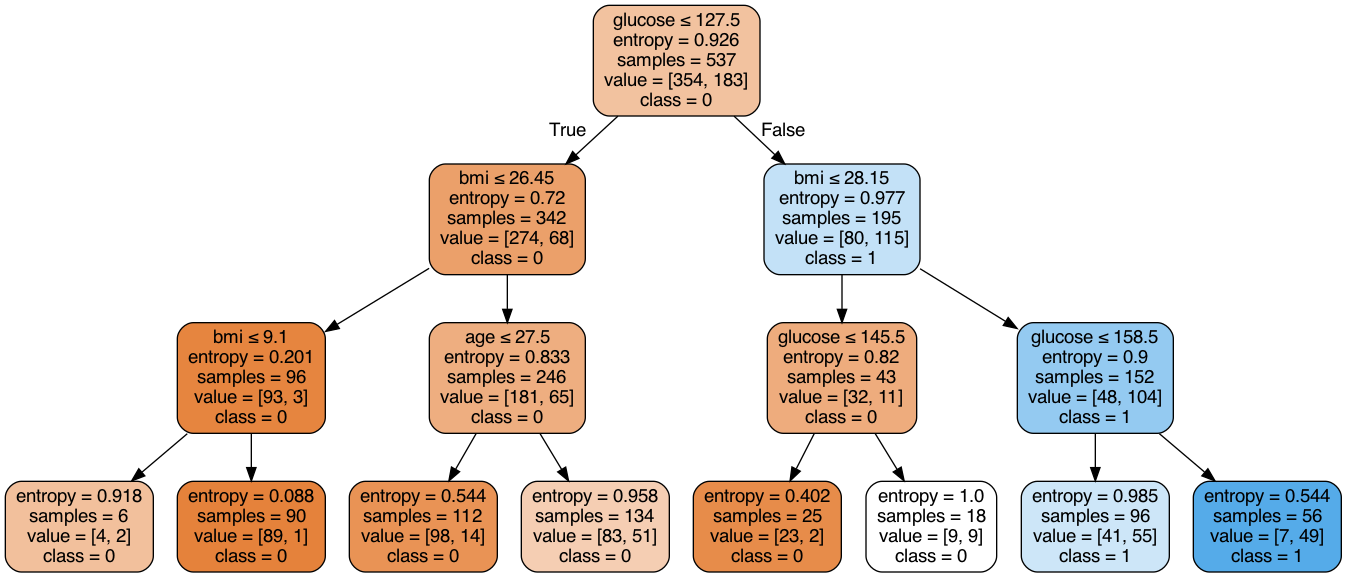

In [92]:
dot_data = StringIO()
tree.export_graphviz(dt,out_file=dot_data, class_names=['0','1'], feature_names=feature_cols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### random forest

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target

In [96]:
import pandas as pd
df = pd.DataFrame(X,columns=iris.feature_names)
df['label'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9777777777777777


In [102]:
clf.predict([[1,2,0.4,0.6]])

array([0])

In [105]:
feature_imp= pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.445625
petal width (cm)     0.415731
sepal length (cm)    0.113026
sepal width (cm)     0.025618
dtype: float64

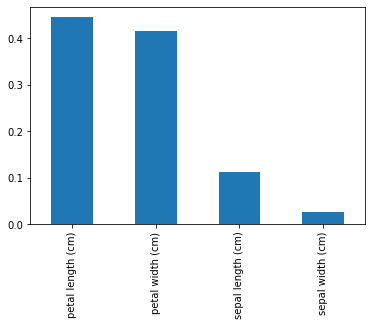

In [106]:
 import matplotlib.pyplot as plt
feature_imp.plot(kind='bar');